In [1]:
import pickle
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

data_df = pickle.load( open( "experiment_final_sweep_base_large.p", "rb" ) )
base_large_runs = data_df[data_df["run.experiment"] == "final_sweep_base_large"]
base_large_runs["run.hash"].unique()

dsfull = base_large_runs[base_large_runs["run.simulate_smaller_dataset"] == 1]
ds10_percent = base_large_runs[base_large_runs["run.simulate_smaller_dataset"] == 0.1]

len(dsfull), len(ds10_percent)

(4047597, 3405994)

In [2]:
_runs7 = dsfull[dsfull["run.lr"] == 1e-6]

In [3]:
_run7large = _runs7[_runs7["run.model_type_b"].str.endswith("single_mae_vit_large_patch16.pt")]

_run7large_noinit = _run7large[~(_run7large["run.load_checkpoint"] == "../h100_max/single_mae_vit_large_patch16.pt")]
_run7large_init = _run7large[_run7large["run.load_checkpoint"] == "../h100_max/single_mae_vit_large_patch16.pt"]

_run7base = _runs7[_runs7["run.model_type_b"].str.endswith("single_mae_vit_base_patch16.pt")]

_run7base_noinit = _run7base[~(_run7base["run.load_checkpoint"] == "../h100_max/single_mae_vit_base_patch16.pt")]
_run7base_init = _run7base[_run7base["run.load_checkpoint"] == "../h100_max/single_mae_vit_base_patch16.pt"]


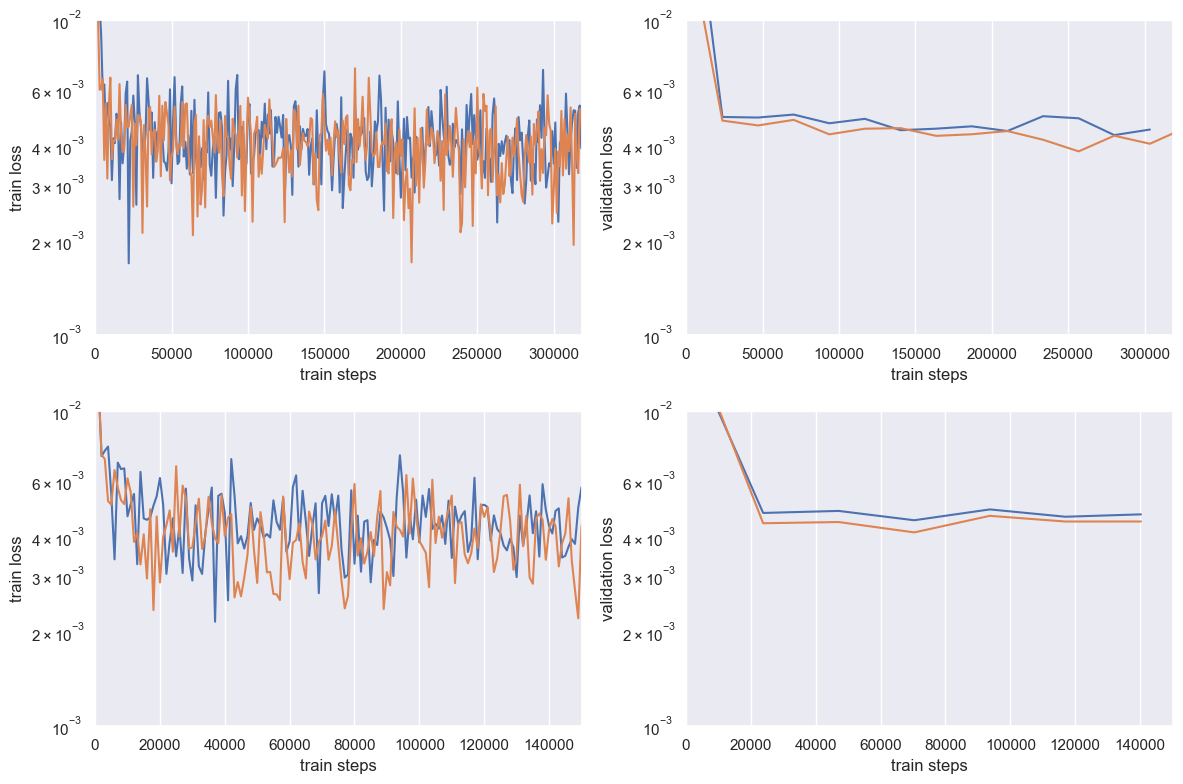

In [4]:
ymin, ymax = 1e-3, 1e-2

fig, ax = plt.subplots(2,2, figsize=(12,8))

xmin = 0
xmax = _run7base_noinit[_run7base_noinit["metric.name"] == "train_loss"]["step"].max()

ax.flat[0].plot(_run7base_noinit[_run7base_noinit["metric.name"] == "train_loss"]["step"][::1000], _run7base_noinit[_run7base_noinit["metric.name"] == "train_loss"]["value"][::1000], label="No weight init")
ax.flat[0].plot(_run7base_init[_run7base_init["metric.name"] == "train_loss"]["step"][::1000], _run7base_init[_run7base_init["metric.name"] == "train_loss"]["value"][::1000], label="Weight init")
ax.flat[0].set_yscale("log")
ax.flat[0].set_ylabel("train loss")
ax.flat[0].set_xlabel("train steps")
ax.flat[0].set_ylim([ymin, ymax])
ax.flat[0].set_xlim([xmin, xmax])

ax.flat[1].plot(_run7base_noinit[_run7base_noinit["metric.name"] == "val_loss"]["step"][::50], _run7base_noinit[_run7base_noinit["metric.name"] == "val_loss"]["value"][::50], label="No weight init")
ax.flat[1].plot(_run7base_init[_run7base_init["metric.name"] == "val_loss"]["step"][::50], _run7base_init[_run7base_init["metric.name"] == "val_loss"]["value"][::50], label="Weight init")
ax.flat[1].set_yscale("log")
ax.flat[1].set_ylabel("validation loss")
ax.flat[1].set_xlabel("train steps")
ax.flat[1].set_ylim([ymin, ymax])
ax.flat[1].set_xlim([xmin, xmax])


xmin = 0
xmax = _run7large_noinit[_run7large_noinit["metric.name"] == "train_loss"]["step"].max()
ax.flat[2].plot(_run7large_noinit[_run7large_noinit["metric.name"] == "train_loss"]["step"][::1000], _run7large_noinit[_run7large_noinit["metric.name"] == "train_loss"]["value"][::1000], label="No weight init")
ax.flat[2].plot(_run7large_init[_run7large_init["metric.name"] == "train_loss"]["step"][::1000], _run7large_init[_run7large_init["metric.name"] == "train_loss"]["value"][::1000], label="Weight init")
ax.flat[2].set_yscale("log")
ax.flat[2].set_ylabel("train loss")
ax.flat[2].set_xlabel("train steps")
ax.flat[2].set_ylim([ymin, ymax])
ax.flat[2].set_xlim([xmin, xmax])


ax.flat[3].plot(_run7large_noinit[_run7large_noinit["metric.name"] == "val_loss"]["step"][::50], _run7large_noinit[_run7large_noinit["metric.name"] == "val_loss"]["value"][::50], label="No weight init")
ax.flat[3].plot(_run7large_init[_run7large_init["metric.name"] == "val_loss"]["step"][::50], _run7large_init[_run7large_init["metric.name"] == "val_loss"]["value"][::50], label="Weight init")
ax.flat[3].set_yscale("log")
ax.flat[3].set_ylabel("validation loss")
ax.flat[3].set_xlabel("train steps")
ax.flat[3].set_ylim([ymin, ymax])
ax.flat[3].set_xlim([xmin, xmax])

plt.tight_layout()

plt.savefig("full_6.pdf")